# Import Libraries

In [1]:
import stmpy
import stmpy.driftcorr as dfc
import scipy as sp
%pylab inline
pylab.style.use("Thin")

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(stmpy.__path__)

['/Users/yuliu/Documents/coding/stmpy/stmpy']


# Theory behind drift correction algorithm 

## Basics of 2D Fourier transform (FT)

(450.0, 550.0)

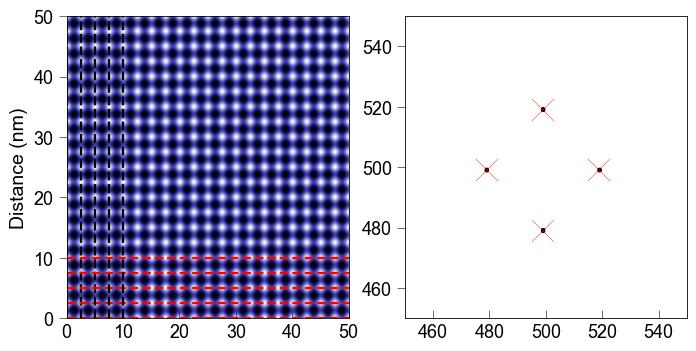

In [3]:
# generating height map 
Pixels = 1000 #map size, in pixels
Length = 50#map size, in nm
d = 2.5 #lattice constant, in nm

a = linspace(0, Length, Pixels)
x, y = meshgrid(a[:-1], a[:-1])
z = cos(x*2*pi/d)+cos(y*2*pi/d)

z_fft =  stmpy.tools.fft(z, zeroDC=True)
peaks = stmpy.tools.find_extrema(z_fft, n = (5,0), minDist=10)
            
fig, ax = subplots(1,2,figsize=[8,4])
ax[0].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[0].set_ylabel('Distance (nm)')
for i in range(5):
    ax[0].axvline(d*i, linestyle='--', color='k')
    ax[0].axhline(d*i, linestyle='--', color='r')

ax[1].imshow(z_fft,  clim=[0,1e5],cmap=stmpy.cm.gray_r)
ax[1].plot(peaks[:,1], peaks[:,0], 'rx',ms=16)
ax[1].set_xlim(450,550)
ax[1].set_ylim(450,550)

(450.0, 550.0)

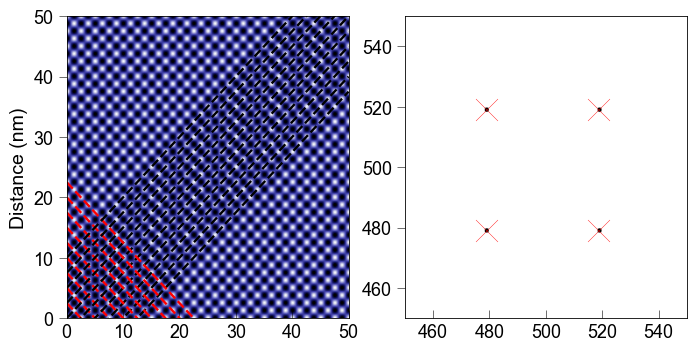

In [4]:
# generating height map 
Pixels = 1000 #map size, in pixels
Length = 50 #map size, in nm
d = 2.5 #lattice constant, in nm

a = linspace(0, Length, Pixels)
x, y = meshgrid(a[:-1], a[:-1])
z = cos(x*2*pi/d)*cos(y*2*pi/d)

z_fft =  stmpy.tools.fft(z, zeroDC=True)
peaks = stmpy.tools.find_extrema(z_fft, n = (5,0), minDist=10)
            
fig, ax = subplots(1,2,figsize=[8,4])
ax[0].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[0].set_ylabel('Distance (nm)')
ax[0].set_xlim(0,50)
ax[0].set_ylim(0,50)
for i in range(10):
    ax[0].plot(a, -a + i * d  , 'r--')
    ax[0].plot(a, a + (i-5)* d , 'k--')
    
ax[1].imshow(z_fft,  clim=[0,1e5],cmap=stmpy.cm.gray_r)
ax[1].plot(peaks[:,1], peaks[:,0], 'rx',ms=16)
ax[1].set_xlim(450,550)
ax[1].set_ylim(450,550)

## Origin of drift in a map

### How are the maps taken?

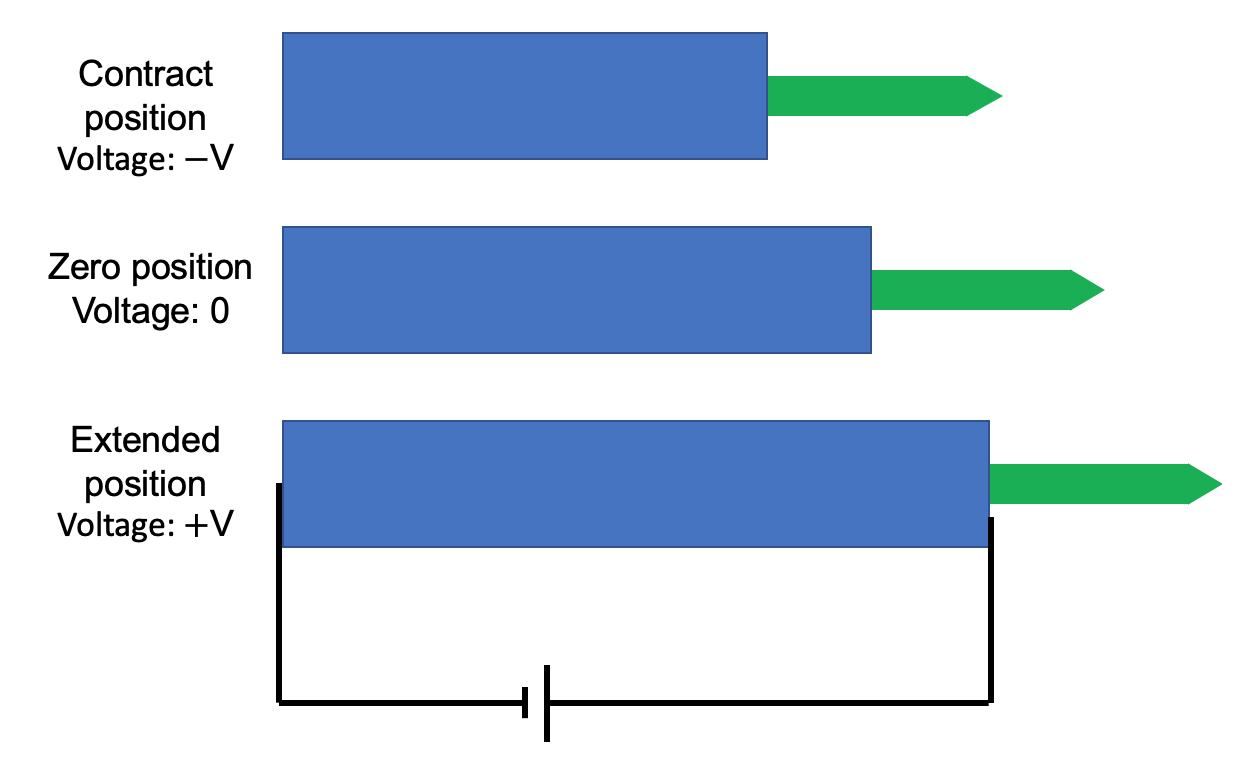

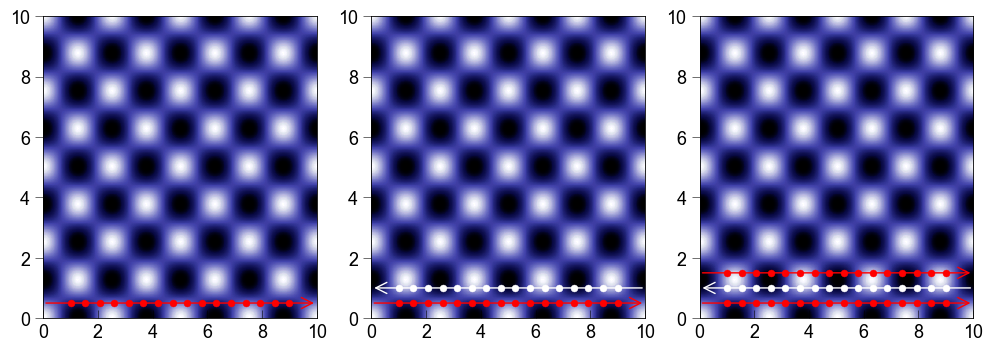

In [5]:
# Topography map
num = int(8/0.5)
x_temp = linspace(1, 9, num)
y_temp = ones(num)
fig,ax = subplots(1,3,figsize=[12,4])
ax[0].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[1].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[2].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])

ax[0].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[0].plot(x_temp, 0.5*y_temp, 'ro', ms=5)

ax[1].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[1].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[1].plot(x_temp, 0.5*y_temp, 'ro', ms=5)
ax[1].plot(x_temp, 1*y_temp, 'wo', ms=5)

ax[2].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[2].annotate(s='', xy=[10,1.5], xytext=[0,1.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].plot(x_temp, 0.5*y_temp, 'ro', ms=5)
ax[2].plot(x_temp, 1*y_temp, 'wo', ms=5)
ax[2].plot(x_temp, 1.5*y_temp, 'ro', ms=5)

for axis in ax:
    axis.set_xlim(0,10)
    axis.set_ylim(0,10)
    

__<center>Tip movement during a topography scan.</center>__

__Red arrows__: Tip moving forward during a topography map

__White arrows__: Tip moving backward during a topography map

Tip is scanning back and forth at a constant speed, while forward scan and backward scans are stored in different channels.

The span of the scan frame defines the size of the map.

How many points in x-direction and how many lines in y-direction defines number of pixels of the map.

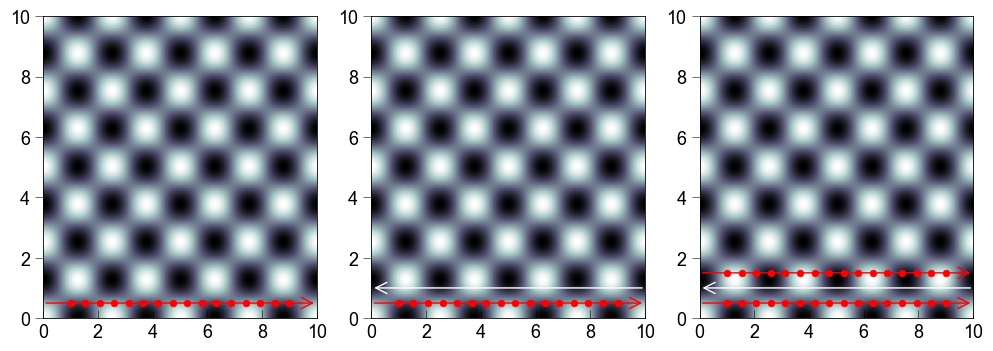

In [6]:
# Grid map
num = int(8/0.5)
x_temp = linspace(1, 9, num)
y_temp = ones(num)
fig,ax = subplots(1,3,figsize=[12,4])
ax[0].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])
ax[1].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])
ax[2].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])

ax[0].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[0].plot(x_temp, 0.5*y_temp, 'ro', ms=5)

ax[1].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[1].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[1].plot(x_temp, 0.5*y_temp, 'ro', ms=5)

ax[2].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[2].annotate(s='', xy=[10,1.5], xytext=[0,1.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].plot(x_temp, 0.5*y_temp, 'ro', ms=5)
ax[2].plot(x_temp, 1.5*y_temp, 'ro', ms=5)

for axis in ax:
    axis.set_xlim(0,10)
    axis.set_ylim(0,10)
    

__<center>Tip movement during a grid map.</center>__

__Red arrows__: Tip moving forward during a grid map

__White arrows__: Tip moving backward during a grid map

Tip is moving forward (red arrows) at a much slower speed than moving back (white arrows). Measurements are only taken when the tip is moving forward.


### Incorrectly calibrated piezos

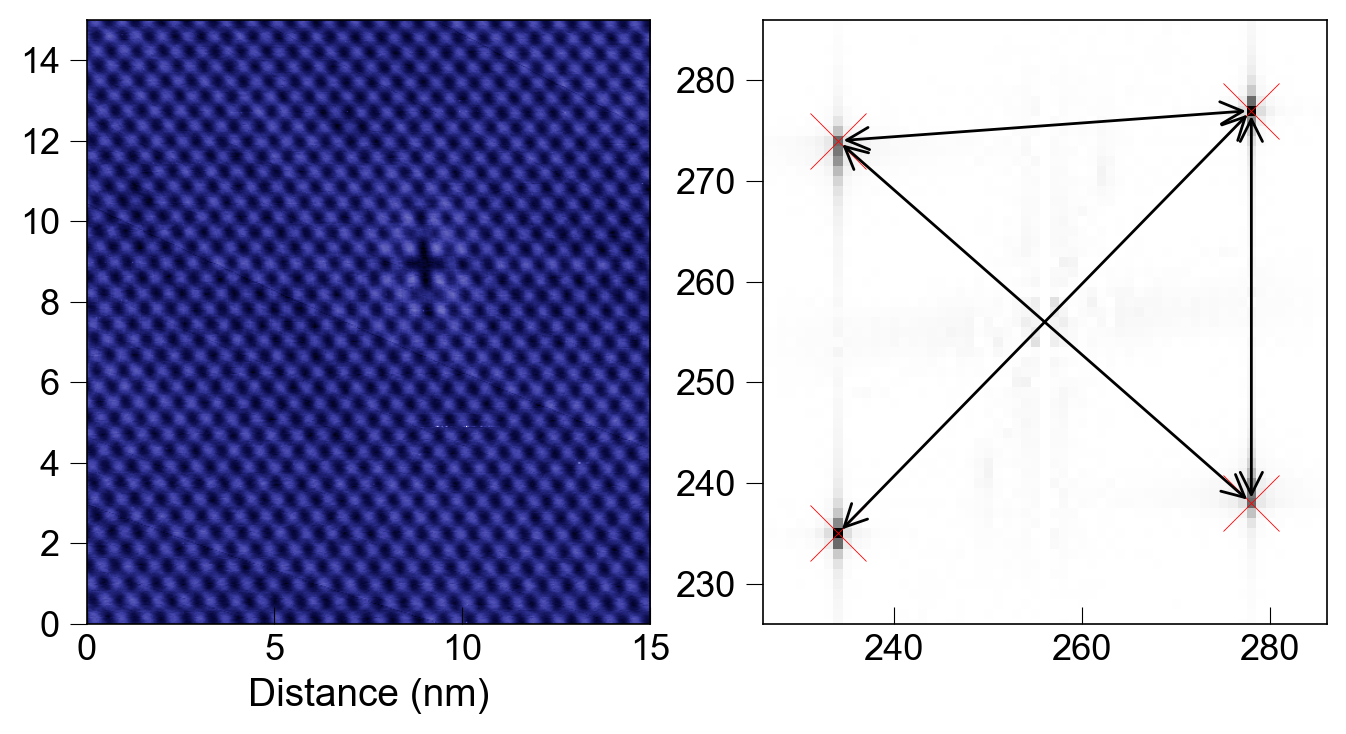

__<center>An example of incorrectly calibrated piezos.</center>__

The real lattice structure here is a cubic lattice, scanned with an angle of 45$^o$. However, the incorrectly calibrated piezos make the FT pattern a diamond instead of a square.

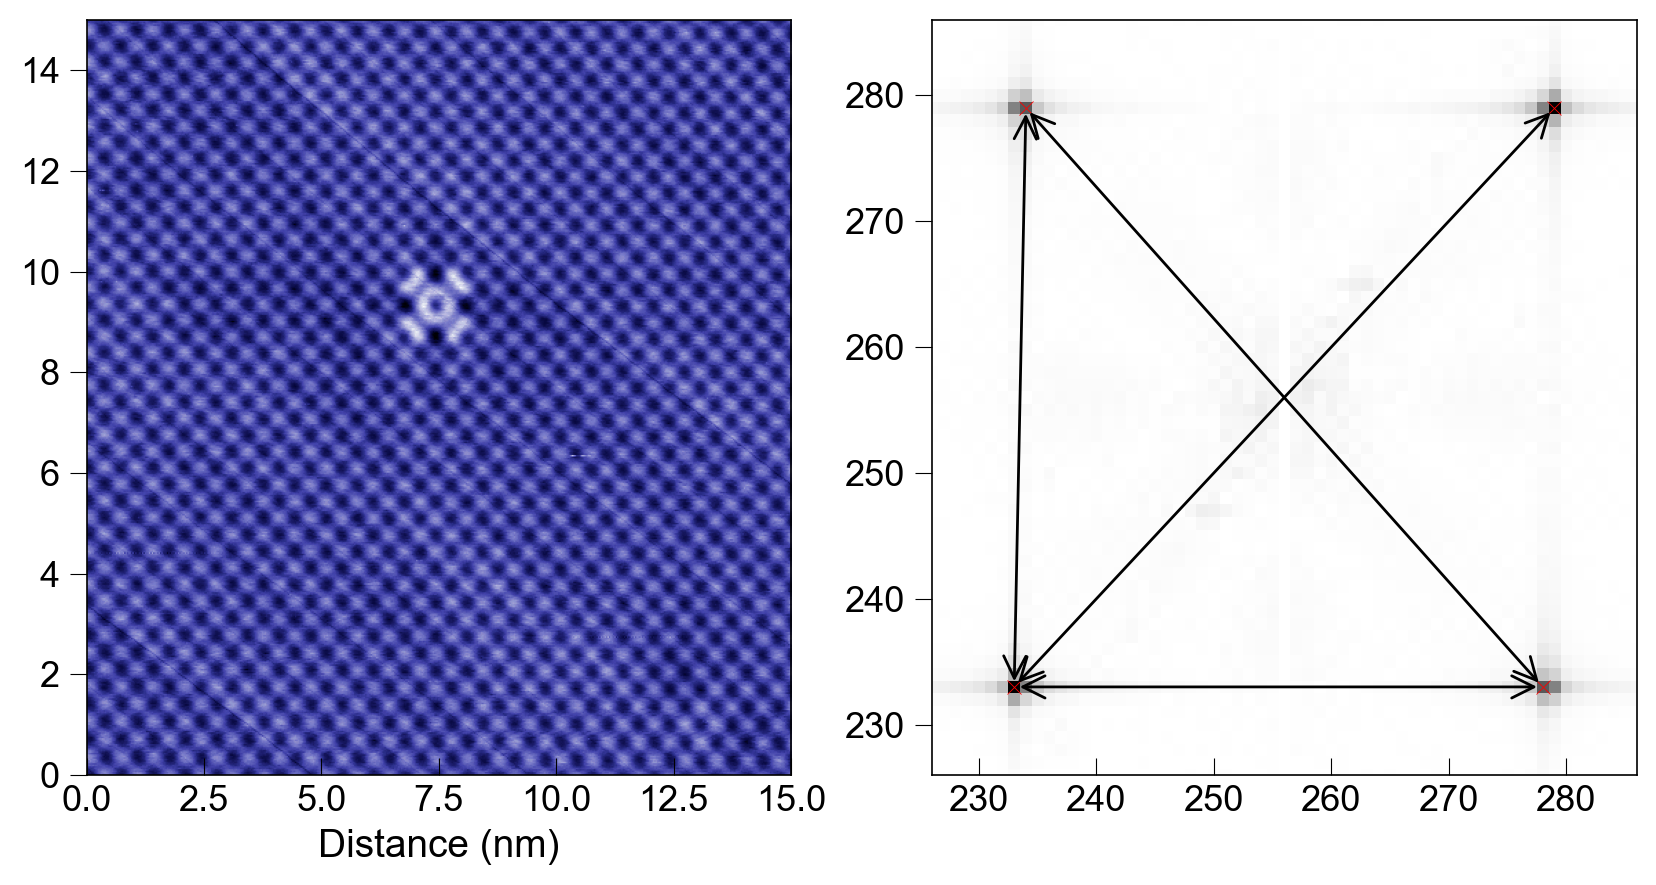

__<center>An example of correctly calibrated piezos.</center>__


### Piezo relaxation and thermal fluctuation

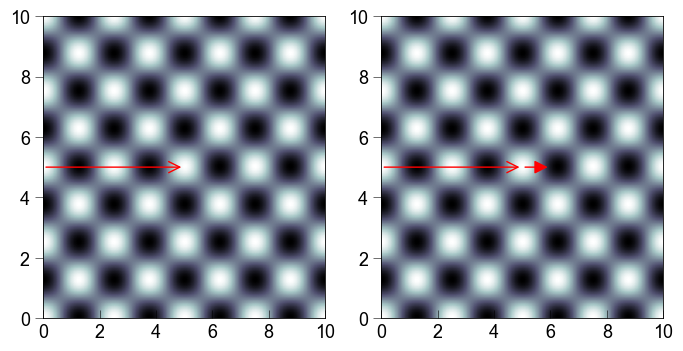

In [7]:
# Piezo relaxation
# num = int(8/0.5)
# x_temp = linspace(1, 9, num)
# y_temp = ones(num)
fig,ax = subplots(1,2,figsize=[8,4])
ax[0].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])
ax[1].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])

ax[0].annotate(s='', xy=[5,5], xytext=[0,5],size=20, arrowprops=dict(color='r', arrowstyle='->'))

ax[1].annotate(s='', xy=[5,5], xytext=[0,5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[1].annotate(s='', xy=[6,5], xytext=[5,5],size=20, arrowprops=dict(color='r', arrowstyle='-|>'))

for axis in ax:
    axis.set_xlim(0,10)
    axis.set_ylim(0,10)
    

__<center>Piezo relaxation induced drift</center>__

After we move the tip to the center of map, although we have stopped changing the voltage applied on the piezos, the piezos themselves need time to relax (to reach a still condition).

If we start another scan immediately after moving the tip, then then actually scanning speed will be the scan speed that we set __PLUS__ the piezo relaxation induced drift speed. What's worse is that this relaxation induced drift is not a constant. As a result, the position point that we stored for the data is not precise.





__Thermal drift__

When temperature of the system is chaning, deformation of the sample and scan tubes can impose another drift, known as thermal drift.

To prevent large piezo relaxation induced drift and thermal drift, you can

* Let the tip relax longer time before setting up topo/grid maps.
* Make sure the temperature is not changing a lot during the measurements.
* Use some post-processing analysis to remove the drift


## Summary

Two types of drift source:

* Incorrectly calibrated piezos
* Piezo relaxation drift and thermal drift

where "incorrectly calibrated piezos" will make the FT pattern deformed from the correct shape, and it can be corrected with geometrical transformation,

while "piezo relaxation drift and thermal drift" will induce the leakage of Bragg peaks, since the size of the lattices are different in different region of the map, the Bragg peak will be scattered instead of collaspe into a single pixel

## Math behind drift correction algorithm

### Introduce the concept of drift field

A perfect lattice represented by a coordinate system $\vec{r'}$:

$
\begin{equation}
    A(\vec{r'}) = cos(\vec{Q_x}\cdot\vec{r'})+cos(\vec{Q_y}\cdot\vec{r'})
\end{equation}
$

Let's introduce a drifting field $\vec{u}(\vec{r})$, where $\vec{u}(\vec{r})$ is varying much slower than the lattice itself (i.e., the frequency of $\vec{u}(\vec{r})$ is much smaller than $\vec{Q_x}$ and $\vec{Q_y}$):

$\vec{r'} = \vec{r} + \vec{u}(\vec{r})$
where $\vec{r'}$ is the coordinate system without any drift, and $\vec{r}$ is the coordinate system of the actual measurement.

Then the same lattice will become:

$
\begin{equation}
    \begin{split}
    A(\vec{r}) &= cos\{\vec{Q_x}\cdot(\vec{r}+\vec{u}(\vec{r}))\}+cos\{\vec{Q_y}\cdot(\vec{r}+\vec{u}(\vec{r}))\} \\
      &= cos\{(\vec{Q_x}\cdot\vec{r})+(\vec{Q_x}\cdot\vec{u}(\vec{r}))\}+cos\{(\vec{Q_y}\cdot(\vec{r})+(\vec{Q_x}\cdot\vec{u}(\vec{r}))\} \\
      &= cos\{\vec{Q_x}\cdot\vec{r} + \phi_x\} + cos\{\vec{Q_y}\cdot(\vec{r}) + \phi_y\}
    \end{split}
\end{equation}
$

__where $\phi_x(\vec{r}) = \vec{Q_x}\cdot\vec{u}(\vec{r})$, and $\phi_y(\vec{r}) = \vec{Q_y}\cdot\vec{u}(\vec{r})$__


### Lock-in measurement

Take $A(\vec{r}) = cos\{\vec{Q_x}\cdot\vec{r} + \phi_x\}$ as an example:

since $cos(\vec{Q_x}\cdot\vec{r} + \phi_x) = cos(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-sin(\vec{Q_x}\cdot\vec{r})sin(\phi_x)$

$
\begin{equation}
    \begin{cases}
    A_{xx} = A \times cos(\vec{Q_x}\cdot\vec{r}) =  cos^2(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})sin(\phi_x)\\
    A_{xy} = A \times sin(\vec{Q_x}\cdot\vec{r}) = sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-sin^2(\vec{Q_x}\cdot\vec{r})sin(\phi_x)
    \end{cases}
\end{equation}
$

that is,

$
\begin{equation}
    \begin{cases}
    A_{xx} = \frac{1}{2}\{1+cos(2\vec{Q_x}\cdot\vec{r})\}cos(\phi_x)-sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})sin(\phi_x)\\
    A_{xy} = sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-\frac{1}{2}\{1-sin(2\vec{Q_x}\cdot\vec{r}))\}sin(\phi_x)
    \end{cases}
\end{equation}
$

Therefore,

$
\begin{equation}
    \begin{cases}
    F^{-1}(g\cdot F(A_{xx}) = \frac{1}{2}cos(\phi_x)\\
    F^{-1}(g\cdot F(A_{xy}) = -\frac{1}{2}sin(\phi_x)\\
    \end{cases}
\end{equation}
$

where $F(A)$ is the 2D Fourier transform of A, and $F^{-1}(f)$ is the 2D inverse Fourier transform of A.

$g(\vec{r})$ is a 2D Gaussian function with the same size as A, and centered at the center of the map (centered at (0,0) point)

Basically, $F^{-1}(g\cdot F(A_{xx})$ will remove almost all non-DC components from $A_{xx}$

Similarly, we can get:

$
\begin{equation}
    \begin{cases}
    F^{-1}(g\cdot F(A_{xx}) = \frac{1}{2}cos(\phi_x)\\
    F^{-1}(g\cdot F(A_{xy}) = -\frac{1}{2}sin(\phi_x)\\
    F^{-1}(g\cdot F(A_{yx}) = \frac{1}{2}cos(\phi_y)\\
    F^{-1}(g\cdot F(A_{yy}) = -\frac{1}{2}sin(\phi_y)\\
    \end{cases}
\end{equation}
$

Thus, we can use following steps to get the phasemep $\phi_x(\vec{r})$ and $\phi_y(\vec{r})$
* Multiply the map A with one of lattice with correct periodicity (for example, $cos(\vec{Q_x}\cdot\vec{r})$) to get $A_{xx}$
* Take Fourier transform of $A_{xx}$
* Multiply that Fourier transform with a center-located 2D Gaussian function $g(\vec{r})$ to remove all non-DC componnet in the FT
* Take Inverse Fourier transform to get cos or sin of the phasemap
* Reconstruc the phasemap with those sin and cos

Finally, we can have

$
\begin{equation}
    \begin{cases}
    tan(\phi_x) = -\frac{F^{-1}(g\cdot F(A_{xy})}{F^{-1}(g\cdot F(A_{xx})}\\
    tan(\phi_y) = -\frac{F^{-1}(g\cdot F(A_{yy})}{F^{-1}(g\cdot F(A_{yx})}\\
    \end{cases}
\end{equation}
$

At the same time, according to the definition of $\phi_x$ and $\phi_y$, we have

$
\begin{equation}
    \begin{cases}
    \phi_x(\vec{r}) = \vec{Q_x}\cdot\vec{u}(\vec{r})\\
    \phi_y(\vec{r}) = \vec{Q_y}\cdot\vec{u}(\vec{r})\\
    \end{cases}
\end{equation}
$

or,

$
\begin{equation}
    \begin{cases}
    \phi_x(\vec{r}) = Q_{xx}u_x + Q_{xy}u_y\\
    \phi_y(\vec{r}) = Q_{yx}u_x + Q_{yy}u_y\\
    \end{cases}
\end{equation}
$

Solve for $u_x$ and $u_y$, we get:

$
\begin{equation}
    \begin{cases}
    u_x(\vec{r}) = -\frac{Q_{yy}\phi_x-Q_{xy}\phi_y}{Q_{xx}Q_{yy}-Q_{xy}Q_{yx}}\\
    u_y(\vec{r}) = -\frac{Q_{yx}\phi_x-Q_{xx}\phi_y}{Q_{xy}Q_{yx}-Q_{xx}Q_{yy}}\\
    \end{cases}
\end{equation}
$

There are two ways to apply the drift field to the original map:

* "lockin" : Interpolate the $A(\vec{r})$, and then apply the function to the coordinate system $\vec{r'} = \vec{r} + \vec{u}(\vec{r})$
* "convolution" : Make use of the formula $f(x-a) = FT^{-1}\{e^{-2\pi iat}FT(f(t)\}$, that is, $A(\vec{r} + \vec{u}) = FT^{-1}\{e^{2\pi i\vec{u}\cdot\vec{t}}FT(f(\vec{t}))\}$

# Simple Use of dfc

## Drift correct a topograph

In [ ]:
# load the topography file
topo = stmpy.load("topo.sxm")
topo.z = stmpy.tools.lineSubtract(topo.Z, 1, maskon=True)



|Filename | Lattice constant(nm)| Image size (nm) |Number of pixels|Lattice orientation|
|-----    |----------------|------------|---------|----------|
|topo.sxm |0.6485          |50          |256$\times$256|45$^o$|


In [ ]:
topo.header

In [ ]:
# create useful attributes for the object
topo = dfc.getAttrs(topo, a0=0.6485, size=50, pixels=256, angle=pi/4, use_a0=True)

In [ ]:
# Visualize the map before any actions. 
# The optional argument sigma defines the color limit to show the FT of the image
dfc.display(topo.z, sigma=3)

In [ ]:
# # create a 4-fold 45-degree mask
# # y-center_y = tan(theta) * (x-center_x)
# t = arange(topo.z.shape[-1])
# x, y = meshgrid(t,t)
# center = array([topo.z.shape[-1], topo.z.shape[-1]]) // 2
# mask3 = ones_like(x)
# thres = 10

# for i in range(2):
#     theta = i*pi/2 + pi/4
#     index = where(absolute(y-center[1] - tan(theta)*(x-center[0])) < thres)
#     mask3[index] = 0
# imshow(mask3)

In [ ]:
# # create a 6-fold 30-degree mask
# # y-center_y = tan(theta) * (x-center_x)
# t = arange(topo.z.shape[-1])
# x, y = meshgrid(t,t)
# center = array([topo.z.shape[-1], topo.z.shape[-1]]) // 2
# mask3 = ones_like(x)
# thres = 10

# for i in range(3):
#     theta = i*pi/3 + pi/3
#     index = where(absolute(y-center[1] - tan(theta)*(x-center[0])) < thres)
#     mask3[index] = 0
# imshow(mask3)

In [ ]:
# find the Bragg peaks 
topo.bp1 = dfc.findBraggs(topo.z, r=0.2, w=0.1, show=True, obj=None, update_obj=True)

In [ ]:
# check the Bragg peaks 
dfc.check_bp(topo.z, topo.bp1)

In [ ]:
# generate the correct Bragg peaks
topo.bp2 = dfc.generate_bp(topo.z, qx=[-46,-46], qy=[46,-46], obj=topo, update_obj=True)

In [ ]:
ux, uy, topo.zcorr = dfc.local_corr(topo.z, obj=topo, bp=topo.bp2, update_obj=True, 
                                     sigma=6, method="convolution",show=True)

In [ ]:
dfc.display(topo.zcorr, sigma=1)

In [ ]:
bp_x = dfc.findBraggs(topo.zcorr, obj=topo, show=True)

In [ ]:
n2 = 10
topo.z_new = dfc.cropedge(topo.zcorr, n=n2, bp=bp_x, obj=topo, update_obj=True,  force_commen=True)
dfc.display(topo.z, topo.z_new, sigma=1)

In [ ]:
topo.parameters['size']

## Drift correct a dos map

In [ ]:
# Load the data
d = stmpy.load("testing map.3ds")
d.z = stmpy.tools.lineSubtract(d.Z)

d.liy_topo = stmpy.tools.lineSubtract(mean(d.LIY, axis=0), maskon=True)



|Filename | Lattice constant(nm)| Image size (nm) |Number of pixels|Lattice orientation|
|-----    |----------------|------------|---------|----------|
|testing map.3ds |0.6485          |50          |256$\times$256|45$^o$|



In [ ]:
d.header

In [ ]:
# create useful attributes for the object
d = dfc.getAttrs(d, a0=0.6485, size=50, pixels=256, angle=pi/4, use_a0=True)

In [ ]:
# Visualize the dos map before drift correction
dfc.display(d.z)
dfc.display(d.liy_topo)

In [ ]:
d.bp1 = dfc.findBraggs(d.liy_topo, w=0.1, obj=d, update_obj=True, show=True)

In [ ]:
dfc.check_bp(d.liy_topo, d.bp1)

In [ ]:
d.bp2 = dfc.generate_bp(d.liy_topo, qx=[-74,-74], qy=[74,-74], obj=d, update_obj=True)
dfc.check_bp(d.liy_topo, d.bp2)

In [ ]:
# Correct for the local drift with spatial lockin method
ux, uy, d.liy_topo_corr = dfc.local_corr(d.liy_topo, sigma=8, bp=d.bp2, method='convolution',
                                    show=True, obj=d, update_obj=True)

In [ ]:
dfc.display(d.liy_topo_corr)

In [ ]:
d.bpx = dfc.findBraggs(d.liy_topo_corr, obj=d, show=True)

In [ ]:
n2 = 20
liy_corr_new = dfc.cropedge(d.liy_topo_corr, n=n2, bp=d.bpx, force_commen=True, obj=d, update_obj=True)
dfc.display(d.liy_topo_corr, liy_corr_new, sigma=2)

In [ ]:
# Apply the drift field to all the layers in the dos map

d.liy_corr = dfc.apply_dfc_3d(d.LIY, ux=ux, uy=uy, matrix=None, bp=d.bpx, 
                              n1=None, n2=n2, method='convolution')

In [ ]:
dfc.display(mean(d.liy_corr, axis=0))

In [ ]:
# save the drift-free data into a separate file
data_to_save = stmpy.io.Spy()
data_to_save.en = d.en
data_to_save.LIY = d.LIY
data_to_save.liy_corr = d.liy_corr

stmpy.save(data_to_save, "data_to_save topo.spy")

# To load the data again, simply use:
# d_new = stmpy.load("data_to_save topo.spy")

# More advanced use of dfc

## Work with non-square lattice

In [ ]:
topo = stmpy.load("HOPG_topo.sxm")
topo.z = stmpy.tools.lineSubtract(topo.Z, 1, maskon=True)

In [ ]:
dfc.display(topo.z)

In [ ]:
topo.header

In [ ]:
# create useful attributes for the object
topo = dfc.getAttrs(topo, a0=0.246, size=20, pixels=512, angle=0, use_a0=True)

In [ ]:
# # create a 4-fold 45-degree mask
# # y-center_y = tan(theta) * (x-center_x)
# t = arange(topo.z.shape[-1])
# x, y = meshgrid(t,t)
# center = array([topo.z.shape[-1], topo.z.shape[-1]]) // 2
# mask3 = ones_like(x)
# thres = 20

# for i in range(2):
#     theta = i*pi/2 + pi/4
#     index = where(absolute(y-center[1] - tan(theta)*(x-center[0])) < thres)
#     mask3[index] = 0
# imshow(mask3)

In [ ]:
topo.bp1 = dfc.findBraggs(topo.z, r=0.1, min_dist=20, thres=0.5, show=True, obj=topo, update_obj=True)

In [ ]:
n1 = 20
topo.zcrop = dfc.cropedge(topo.z, n=n1, obj=topo, update_obj=False)

In [ ]:
center = 472 // 2
t = arange(472)
x,y = meshgrid(t,t)
mask3 = ones_like(x)

index = where(absolute(x-center) < 20)
mask3[index] = 0
imshow(mask3)

In [ ]:
topo.bp1 = dfc.findBraggs(topo.zcrop, r=0.2, min_dist=10, mask3=mask3,
                          thres=0.4, show=True, obj=topo, update_obj=True)
# topo.bp1 = delete(topo.bp1, [0,7], axis=0)
# topo.bp1

In [ ]:
dfc.check_bp(topo.zcrop, bp=topo.bp1)

In [ ]:
qx = [41, -int(41*sqrt(3))]
qy = [41, int(41*sqrt(3))]
topo.bp2 = dfc.generate_bp(topo.zcrop, qx=qx, qy=qy, obj=topo, update_obj=True)
dfc.check_bp(topo.zcrop, bp=topo.bp2)

In [ ]:
ux, uy, topo.zcorr = dfc.local_corr(topo.zcrop, obj=topo, bp=topo.bp2, update_obj=True, 
                                     sigma=6, method="lockin",show=True)

In [ ]:
dfc.display(topo.z, topo.zcorr, sigma=1)

In [ ]:
bp_x = dfc.findBraggs(topo.zcorr, obj=topo, show=True)

In [ ]:
n2 = 20
topo.z_new = dfc.cropedge(topo.zcorr, n=n2, bp=bp_x, obj=topo, update_obj=True,  force_commen=True)
dfc.display(topo.z, topo.z_new, sigma=3)

## Work with rectangular dataset

In [ ]:
# Load the data
d = stmpy.load("testing map.3ds")
d.z = stmpy.tools.lineSubtract(d.Z)[120:,:]


In [ ]:
d.liy = copy(d.LIY)[:,120:,:]
d.liy_topo = stmpy.tools.lineSubtract(mean(d.liy, axis=0), 1)

In [ ]:
dfc.display(d.z, d.liy_topo)

In [ ]:
d = dfc.getAttrs(d, a0=0.6485, size=[50, 50*(256-120)/256], pixels=[256, 256-120], angle=pi/4, use_a0=True)

In [ ]:
d.bp1 = dfc.findBraggs(d.liy_topo, r=0.4, w=0.1, show=True, obj=d, update_obj=True)

In [ ]:
dfc.check_bp(d.liy_topo, bp=d.bp1)

In [ ]:
d.m1, d.liy_gcorr = dfc.global_corr(d.liy_topo, bp=d.bp1, show=True, obj=d, update_obj=True)

In [ ]:
n1 = [10,6,10,4]
d.liy_crop = dfc.cropedge(d.liy_gcorr, n=n1, obj=d, update_obj=True)
dfc.display(d.liy_crop)

In [ ]:
d.bp2 = dfc.findBraggs(d.liy_crop, show=True, obj=d)
dfc.check_bp(d.liy_crop, d.bp2)

d.bp2_new = dfc.generate_bp(d.liy_crop, qx=[-70,-36], qy=[70,-36], obj=d, update_obj=True)
dfc.check_bp(d.liy_crop, d.bp2_new)

In [ ]:
ux, uy, d.liy_topo_corr = dfc.local_corr(d.liy_crop, bp=d.bp2_new, sigma=6, method='lockin', show=True,
                                   obj=d, update_obj=True)

In [ ]:
dfc.display(d.liy_topo_corr)

In [ ]:
d.bpx = dfc.findBraggs(d.liy_topo_corr, obj=d, show=True)
dfc.check_bp(d.liy_topo_corr, d.bpx)
n2 = [6,6,4,4,]
liy_corr_new = dfc.cropedge(d.liy_topo_corr, n=n2, bp=d.bpx, force_commen=True, obj=d, update_obj=True)
dfc.display(d.liy_topo_corr, liy_corr_new, sigma=2)

In [ ]:
# Apply the drift field to all the layers in the dos map

d.liy_corr = dfc.apply_dfc_3d(d.liy, ux=ux, uy=uy, matrix=d.m1, bp=d.bpx, 
                              n1=n1, n2=n2, method='lockin')

# Practice